In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install pytrends requests beautifulsoup4 spacy

# Import libraries
import time
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import spacy

# Load the spacy model for NLP
from spacy.lang.en.examples import sentences

# Load the English NLP model for text analysis
nlp = spacy.load("en_core_web_sm")

In [3]:
# Get Google Trends Data
def fetch_trends():
    pytrends = TrendReq(hl='en-US', tz=360)
    keywords = ["Seamless Leggings", "Tennis Dress", "Yoga Set"]

    session = requests.Session()
    try:
        time.sleep(random.uniform(20,40))  # Randomized delay between requests
        pytrends.build_payload(keywords, timeframe="today 12-m", geo="US")
        trend_data = pytrends.interest_over_time()
        return trend_data
    except Exception as e:
        print("Error fetching data:", e)
        return None

In [4]:
# Scrape Wikipedia for insights on Athleisure
def scrape_wikipedia():
    url = "https://en.wikipedia.org/wiki/Athleisure"

    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")

        # Extract and clean text
        text = " ".join([para.text for para in paragraphs])
        return text
    else:
        return None

In [5]:
# Scrape the Vogue Article for fashion insights
def scrape_vogue():
    url = "https://www.vogue.com/article/runway-inspired-sporty-looks-spring-2025"

    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract headlines and paragraphs
        headlines = [h.text for h in soup.find_all("h2")]
        paragraphs = [p.text for p in soup.find_all("p")]

        text = " ".join(headlines + paragraphs)
        return text
    else:
        return None

In [6]:
# Text Processing & Trend Analysis
def analyze_text(text):
    doc = nlp(text.lower())

    # Filter for fashion related words that are nouns or adjectives
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]

    # Count the words that are most common
    word_freq = Counter(keywords)
    return word_freq.most_common(10)

In [7]:
# Data Visualization
def plot_trends(trend_data, keywords):
    plt.figure(figsize=(12, 6))
    for i, keyword in enumerate(keywords):
        plt.plot(trend_data.index, trend_data[keyword], label=keyword,
                 color=["#EC91F4", "#9080E9", "#4DDDF2"][i % 3], linewidth=2)
    plt.title("Google Trends: Activewear Trends Over Time", fontsize=14, fontweight='bold')
    plt.xlabel("Date", fontsize=12, fontweight='bold')
    plt.ylabel("Search Interest", fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


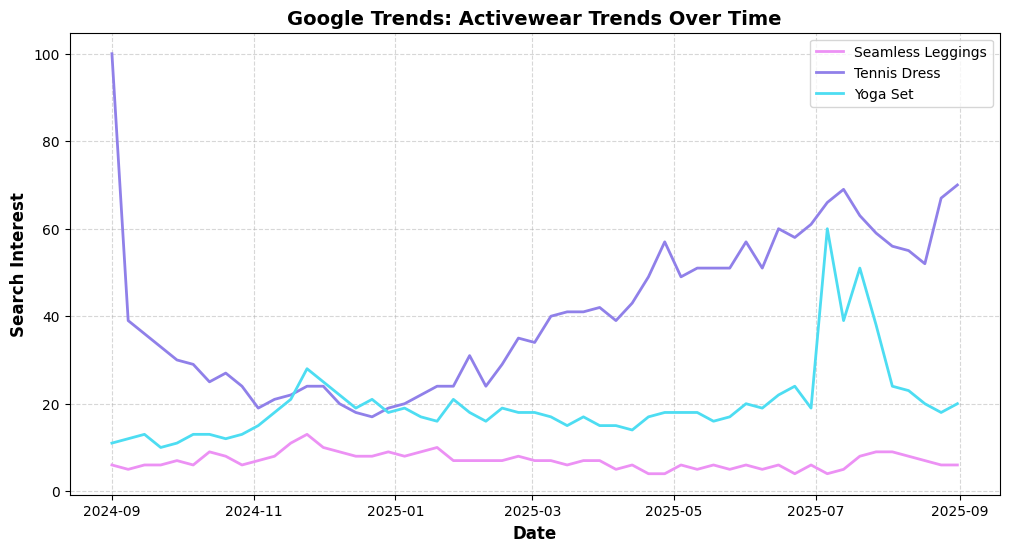


 Wikipedia Trend Keywords: [('athleisure', 25), ('market', 13), ('athletic', 10), ('fashion', 9), ('clothing', 8), ('apparel', 8), ('brands', 8), ('wear', 6), ('modern', 6), ('yoga', 5)]

Vogue Fashion Trend Keywords: [('porter', 22), ('net', 16), ('style', 10), ('leather', 10), ('vogue', 7), ('sneakers', 7), ('jacket', 6), ('cotton', 6), ('sporty', 5), ('track', 5)]


In [8]:
# Full Pipeline
if __name__ == "__main__":
    # Call the Google Trends function
    trends = fetch_trends()
    if trends is not None:
        plot_trends(trends, ["Seamless Leggings", "Tennis Dress", "Yoga Set"])

    # Call the scrape wikipedia function
    wiki_text = scrape_wikipedia()
    if wiki_text:
        wiki_trends = analyze_text(wiki_text)
        print("\n Wikipedia Trend Keywords:", wiki_trends)

    # Call the vogue function
    vogue_text = scrape_vogue()
    if vogue_text:
        vogue_trends = analyze_text(vogue_text)
        print("\nVogue Fashion Trend Keywords:", vogue_trends)

## **Key Observations**
Tennis Dress had a massive peak (~September 2024), .Indicating a viral trend around that time which could be because of the US Open 2024.

Yoga Set is steadily increasing (late 2024 - early 2025), as brands like Lululemon and Alo Yoga are increasing their styles people are getting more curious about the designs. Also it maybe linked to the rise in wellness culture and fitness lifestyle.

Seamless Leggings remain stable with slight growth which indicates that there is a consistent demand and the leggings have become a core activewear staple.